# 통계적 방법에 따른 변수 선택 및 분류

- 결측치 제거 및 통계적 방법으로 선정된 컬럼을 가진 데이터를 활용
- random forest, logistic , svm classifier를 통해 분류

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

In [3]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use("ggplot")


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm

# 통계적 방법에 따른 변수 로드

In [5]:
#기초 전처리 데이터 출력
x_train = pd.read_excel("../data/cip_clean.xlsx")
x_test = pd.read_excel("../data/cip_clean_test.xlsx")

y_train = pd.read_excel("../data/cip_clean_y.xlsx")
y_test = pd.read_excel("../data/cip_clean_test_y.xlsx")

In [6]:
x_train.drop(['factor1','factor2','factor3'],axis=1,inplace=True)
x_test.drop(['factor1','factor2','factor3'],axis=1,inplace=True)

In [7]:
x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] = x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [8]:
x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] =x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [9]:
x_train.columns

Index(['iDBP', 'iBT', 'pCO2', 'SaO2', 'Hb', 'Plt', 'sex', 'bed', 'Foley',
       'Nursing', 'Hsp-acq', '3m-Ab', '3m-Adm', 'NR', '1y-UTI', 'PPIantacid',
       'CV'],
      dtype='object')

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        374 non-null    int64   
 1   iBT         374 non-null    float64 
 2   pCO2        374 non-null    float64 
 3   SaO2        374 non-null    float64 
 4   Hb          374 non-null    float64 
 5   Plt         374 non-null    int64   
 6   sex         374 non-null    category
 7   bed         374 non-null    category
 8   Foley       374 non-null    category
 9   Nursing     374 non-null    category
 10  Hsp-acq     374 non-null    category
 11  3m-Ab       374 non-null    category
 12  3m-Adm      374 non-null    category
 13  NR          374 non-null    category
 14  1y-UTI      374 non-null    category
 15  PPIantacid  374 non-null    category
 16  CV          374 non-null    category
dtypes: category(11), float64(4), int64(2)
memory usage: 23.0 KB


In [11]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        94 non-null     int64   
 1   iBT         94 non-null     float64 
 2   pCO2        94 non-null     float64 
 3   SaO2        94 non-null     float64 
 4   Hb          94 non-null     float64 
 5   Plt         94 non-null     int64   
 6   sex         94 non-null     category
 7   bed         94 non-null     category
 8   Foley       94 non-null     category
 9   Nursing     94 non-null     category
 10  Hsp-acq     94 non-null     category
 11  3m-Ab       94 non-null     category
 12  3m-Adm      94 non-null     category
 13  NR          94 non-null     category
 14  1y-UTI      94 non-null     category
 15  PPIantacid  94 non-null     category
 16  CV          94 non-null     category
dtypes: category(11), float64(4), int64(2)
memory usage: 6.9 KB


# 분류

## Logistic regression

In [11]:
import statsmodels.api as sm

numeric_cols=[]
for idx,col in enumerate(x_train.columns):
    col_type = x_train[col].dtype
    if col_type.name !='category':
        numeric_cols.append(col)

In [12]:
#표준화


scaler = StandardScaler()

x_train_stat_logistic = x_train.copy()
x_test_stat_logistic = x_test.copy()


x_train_stat_logistic[numeric_cols] = scaler.fit_transform(x_train_stat_logistic[numeric_cols])
x_test_stat_logistic[numeric_cols] = scaler.transform(x_test_stat_logistic[numeric_cols])




In [13]:
col_all = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb',
           'Foley','NR','iBT','sex','SaO2','Nursing','iDBP','pCO2',
           'Plt','CV','PPIantacid']
col5 = col_all[:5]
col10 = col_all[:10]
col15 = col_all[:15]

In [14]:
x_train_stat5_logistic = x_train_stat_logistic.copy()
x_train_stat5_logistic = x_train_stat_logistic[col5]

x_test_stat5_logistic = x_test_stat_logistic.copy()
x_test_stat5_logistic = x_test_stat_logistic[col5]


x_train_stat10_logistic = x_train_stat_logistic.copy()
x_train_stat10_logistic = x_train_stat_logistic[col10]

x_test_stat10_logistic = x_test_stat_logistic.copy()
x_test_stat10_logistic = x_test_stat_logistic[col10]


x_train_stat15_logistic = x_train_stat_logistic.copy()
x_train_stat15_logistic = x_train_stat_logistic[col15]

x_test_stat15_logistic = x_test_stat_logistic.copy()
x_test_stat15_logistic = x_test_stat_logistic[col15]


### reduced

In [15]:


logit_mod = sm.Logit(y_train['CIP'], x_train_stat_logistic)
results = logit_mod.fit()

#model_logistic = LogisticRegression( )
#model_logistic.fit( x_train_base_logistic, y_train['CIP'] )
#model_logistic.predict( x_test_base_logistic )

predicted = results.predict(x_test_stat_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.597524
         Iterations 8
0     0.442883
1     0.477561
2     0.429049
3     0.554577
4     0.456329
        ...   
89    0.297300
90    0.781534
91    0.816833
92    0.403711
93    0.357622
Length: 94, dtype: float64
Baseline accuracy :  0.6063829787234043
Baseline recall :  0.7446808510638298


In [16]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                    CIP   No. Observations:                  374
Model:                          Logit   Df Residuals:                      357
Method:                           MLE   Df Model:                           16
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.1379
Time:                        03:04:07   Log-Likelihood:                -223.47
converged:                       True   LL-Null:                       -259.23
Covariance Type:            nonrobust   LLR p-value:                 5.408e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
iDBP          -0.1027      0.123     -0.836      0.403      -0.344       0.138
iBT           -0.1356      0.275     -0.493      0.622      -0.674       0.403
pCO2           0.1156      0.121      0.956      0.3

In [17]:
print(classification_report(y_true=y_test['CIP'],y_pred=predicted) )

              precision    recall  f1-score   support

           0       0.65      0.47      0.54        47
           1       0.58      0.74      0.65        47

    accuracy                           0.61        94
   macro avg       0.62      0.61      0.60        94
weighted avg       0.62      0.61      0.60        94



In [18]:
results.pvalues[results.pvalues<0.05]

Hsp-acq    0.002054
NR         0.018909
1y-UTI     0.019396
dtype: float64

In [19]:
np.exp(results.params)

iDBP          0.902361
iBT           0.873226
pCO2          1.122513
SaO2          0.205043
Hb            0.384057
Plt           1.109126
sex           0.817348
bed           1.742164
Foley         0.931423
Nursing       1.387405
Hsp-acq       3.855968
3m-Ab         1.554247
3m-Adm        0.890774
NR            0.508904
1y-UTI        2.048734
PPIantacid    0.673485
CV            0.918232
dtype: float64

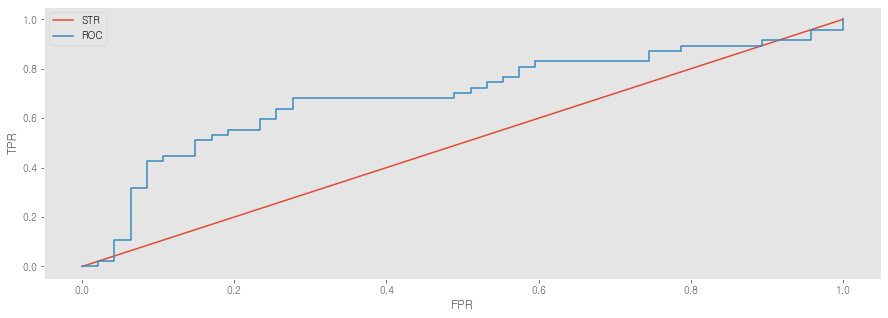

In [20]:
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_stat_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [22]:
    #baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))

roc auc value 0.6889995473064736


### 10 변수

In [23]:


logit_mod = sm.Logit(y_train['CIP'], x_train_stat10_logistic)
results = logit_mod.fit()

predicted = results.predict(x_test_stat10_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.610995
         Iterations 7
0     0.424077
1     0.475484
2     0.419106
3     0.493712
4     0.458999
        ...   
89    0.394280
90    0.747522
91    0.804411
92    0.395505
93    0.511658
Length: 94, dtype: float64
Baseline accuracy :  0.6063829787234043
Baseline recall :  0.7021276595744681


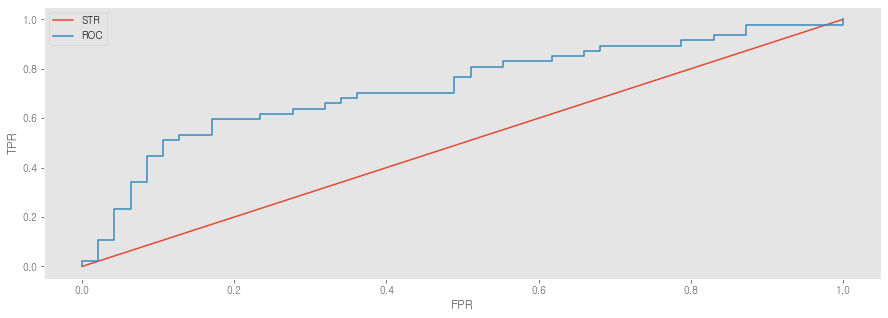

In [25]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_stat10_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [26]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7247623358985966


### 15 변수

In [27]:


logit_mod = sm.Logit(y_train['CIP'], x_train_stat15_logistic)
results = logit_mod.fit()

predicted = results.predict(x_test_stat15_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.602200
         Iterations 8
0     0.434443
1     0.536482
2     0.446296
3     0.545979
4     0.443138
        ...   
89    0.309651
90    0.759265
91    0.789437
92    0.392944
93    0.303517
Length: 94, dtype: float64
Baseline accuracy :  0.6382978723404256
Baseline recall :  0.8297872340425532


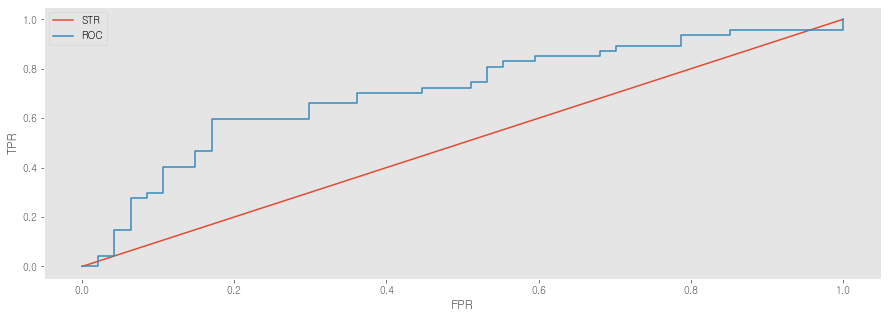

In [28]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_stat15_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [29]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7052965142598461


## SVM

In [30]:
#표준화


scaler = StandardScaler()

x_train_stat_svm = x_train.copy()
x_test_stat_svm = x_test.copy()


x_train_stat_svm[numeric_cols] = scaler.fit_transform(x_train_stat_svm[numeric_cols])
x_test_stat_svm[numeric_cols] = scaler.transform(x_test_stat_svm[numeric_cols])




In [31]:
x_train_stat5_svm = x_train_stat_svm.copy()
x_train_stat5_svm = x_test_stat_svm[col5]

x_test_stat5_svm = x_test_stat_svm.copy()
x_test_stat5_svm = x_test_stat_svm[col5]


x_train_stat10_svm = x_train_stat_svm.copy()
x_train_stat10_svm = x_train_stat_svm[col10]

x_test_stat10_svm = x_test_stat_svm.copy()
x_test_stat10_svm = x_test_stat_svm[col10]


x_train_stat15_svm = x_train_stat_svm.copy()
x_train_stat15_svm = x_train_stat_svm[col15]

x_test_stat15_svm = x_test_stat_svm.copy()
x_test_stat15_svm = x_test_stat_svm[col15]


### reduced

In [41]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
2,0.100,0.716216
4,10.000,0.708324
5,25.000,0.708288
1,0.010,0.702991
6,50.000,0.702955
7,100.000,0.702955
3,1.000,0.697550
0,0.001,0.502667


In [44]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 0.1}


In [33]:
model_best_svm = svm.SVC(C=0.1,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_stat_svm, y_train['CIP'])

SVC(C=0.1, kernel='linear', probability=True, random_state=1234)

In [34]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.702
recall score: 0.596


In [44]:
y_test

,CIP
0,0
1,1
2,1
3,0
4,0
...,...
89,0
90,0
91,1
92,0


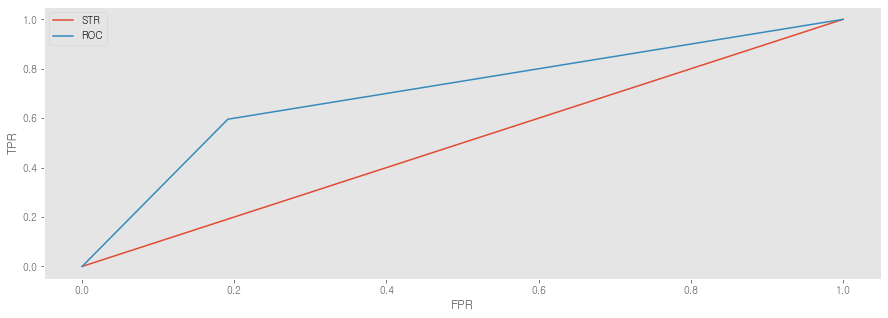

In [46]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_stat_svm)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [47]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7021276595744681


### 10 변수

In [48]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat10_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
5,25.000,0.721838
2,0.100,0.716252
6,50.000,0.708324
7,100.000,0.708324
3,1.000,0.700324
4,10.000,0.700252
1,0.010,0.686919
0,0.001,0.502667


In [50]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 25}


In [51]:
model_best_svm = svm.SVC(C=25,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_stat10_svm, y_train['CIP'])

SVC(C=25, kernel='linear', probability=True, random_state=1234)

In [52]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat10_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.745
recall score: 0.617


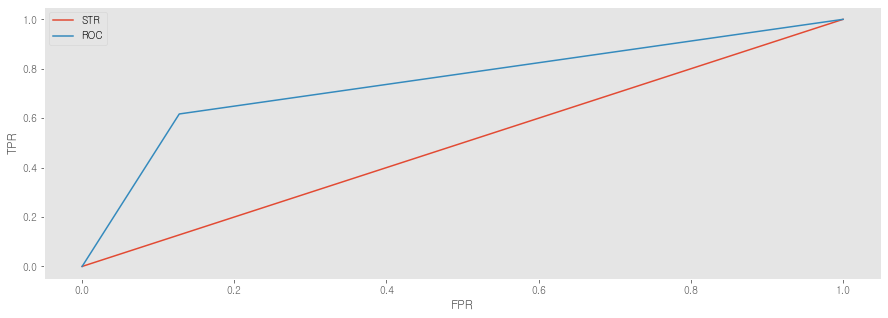

In [54]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_stat10_svm)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [55]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7446808510638299


### 15 변수

In [56]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat15_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
2,0.100,0.721550
4,10.000,0.705658
5,25.000,0.705658
6,50.000,0.705622
7,100.000,0.705622
3,1.000,0.700252
1,0.010,0.684288
0,0.001,0.502667


In [53]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 0.1}


In [57]:
model_best_svm = svm.SVC(C=0.1,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_stat10_svm, y_train['CIP'])

SVC(C=0.1, kernel='linear', probability=True, random_state=1234)

In [54]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat15_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.702
recall score: 0.596


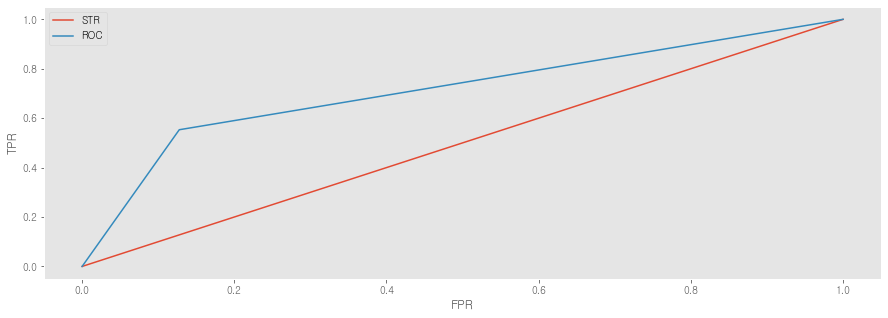

In [58]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_stat10_svm)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [59]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7127659574468086


## random forest

In [60]:
x_train_stat10_rf = x_train.copy()
x_train_stat10_rf = x_train_stat10_rf[col10]

x_test_stat10_rf = x_test.copy()
x_test_stat10_rf = x_test_stat10_rf[col10]


x_train_stat15_rf = x_train.copy()
x_train_stat15_rf = x_train_stat15_rf[col15]

x_test_stat15_rf = x_test.copy()
x_test_stat15_rf = x_test_stat15_rf[col15]


### reduced

In [61]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [62]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 180, 'max_depth': 3}


In [63]:
model_best = RandomForestClassifier(n_estimators=180, max_depth=3,random_state=1234)
model_best.fit(x_train, y_train['CIP'])

RandomForestClassifier(max_depth=3, n_estimators=180, random_state=1234)

In [64]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.681
recall score: 0.617


<AxesSubplot:>

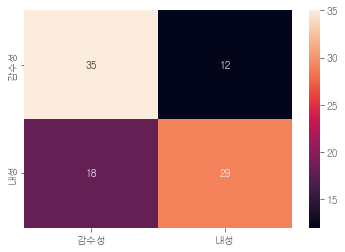

In [65]:

cm = pd.DataFrame(confusion_matrix(y_true=y_test,y_pred = predicted), columns=['감수성','내성'], index=['감수성','내성'])
sns.heatmap(cm, annot=True)

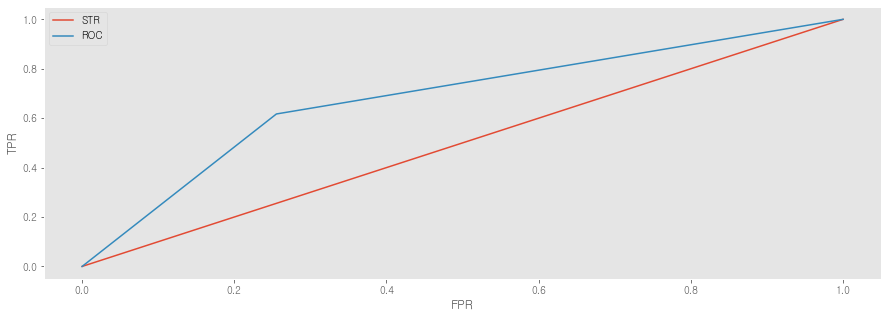

In [66]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [67]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.6808510638297873


결과적으로, 

모든 변수를 포함한 BASELINE이 0.69 었는데, 통계적 방법에 따른 선택시 0.68이 되었다.

17개의 변수를 사용했을때, shap을 이용했을 때 보다 accuracy는 떨어진다. 하지만, 더 높은 recall을 달성했다.

### 10 변수

In [60]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train_stat10_rf, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [61]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 170, 'max_depth': 1}


In [70]:
model_best = RandomForestClassifier(n_estimators=170, max_depth=1,random_state=1234)
model_best.fit(x_train_stat10_rf, y_train['CIP'])

RandomForestClassifier(max_depth=1, n_estimators=170, random_state=1234)

In [71]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test_stat10_rf)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.67
recall score: 0.553


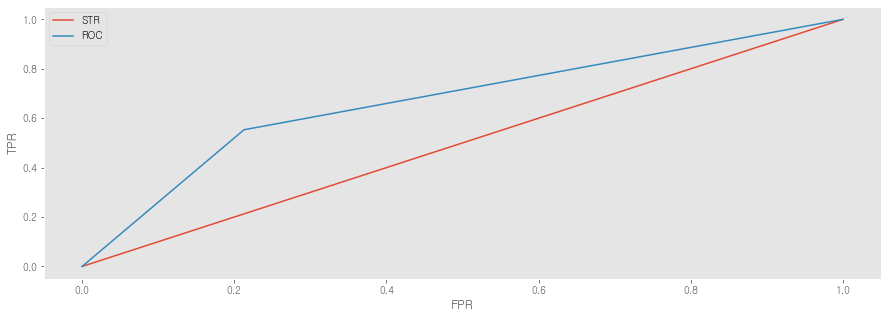

In [72]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test_stat10_rf)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [73]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.6702127659574468


### 15 변수

In [63]:
param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train_stat15_rf, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [64]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 250, 'max_depth': 3}


In [76]:
model_best = RandomForestClassifier(n_estimators=250, max_depth=3,random_state=1234)
model_best.fit(x_train_stat15_rf, y_train['CIP'])

RandomForestClassifier(max_depth=3, n_estimators=250, random_state=1234)

In [77]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test_stat15_rf)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.66
recall score: 0.596


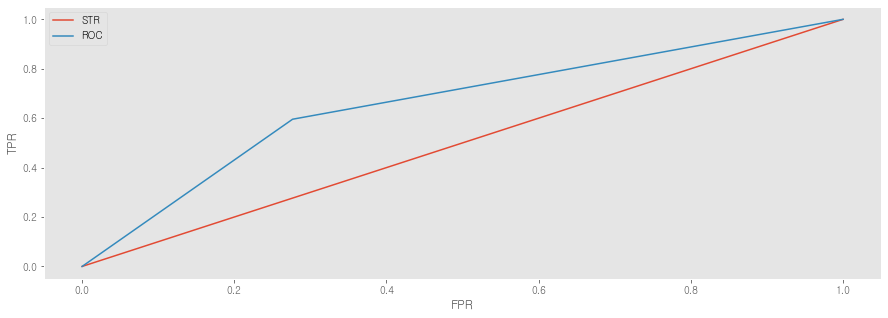

In [78]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test_stat15_rf)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [79]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.6595744680851063


# metric

In [45]:
def my_specificity(recall,acc):
    d = recall*47
    a = 94*acc-d
    spec = a/47
    return spec

In [9]:
rf_recalls=[0.574,0.574,0.574,0.78,0.617,0.553,0.8,0.553,0.596,0.76,0.553,0.596]
rf_accs=[0.6595,0.691,0.691,0.52,0.745,0.702,0.638,0.713,0.702,0.6489,0.713,0.7002]
rf_specificty = []

for i,recall in enumerate(rf_recalls):
    rf_specificty.append(my_specificity(recall,rf_accs[i]))
    print(my_specificity(recall,rf_accs[i]))

0.745
0.8079999999999999
0.8079999999999999
0.25999999999999995
0.8730000000000001
0.851
0.476
0.8729999999999998
0.8079999999999999
0.5378000000000001
0.8729999999999998
0.8044000000000002


In [10]:
stat_recalls=[0.574,0.574,0.574,0.7,0.617,0.553,0.83,0.59,0.596,0.74,0.596,0.617]
stat_accs=[0.6595,0.691,0.691,0.606,0.745,0.67,0.638,0.702,0.66,0.606,0.702,0.681]
stat_specificty=[]
for i,recall in enumerate(stat_recalls):
    stat_specificty.append(my_specificity(recall,stat_accs[i]))
    print(my_specificity(recall,stat_accs[i]))

0.745
0.8079999999999999
0.8079999999999999
0.512
0.8730000000000001
0.7870000000000001
0.44600000000000006
0.8140000000000001
0.7240000000000001
0.4719999999999999
0.8079999999999999
0.7450000000000003


In [12]:
rf_specificty

[0.745,
 0.8079999999999999,
 0.8079999999999999,
 0.25999999999999995,
 0.8730000000000001,
 0.851,
 0.476,
 0.8729999999999998,
 0.8079999999999999,
 0.5378000000000001,
 0.8729999999999998,
 0.8044000000000002]

In [11]:
stat_specificty

[0.745,
 0.8079999999999999,
 0.8079999999999999,
 0.512,
 0.8730000000000001,
 0.7870000000000001,
 0.44600000000000006,
 0.8140000000000001,
 0.7240000000000001,
 0.4719999999999999,
 0.8079999999999999,
 0.7450000000000003]

In [47]:
common_recalls=[0.766,0.553,0.596]
common_accs=[0.627,0.713,0.702]

for i,recall in enumerate(common_recalls):
    print(my_specificity(recall,common_accs[i]))

0.488
0.8729999999999998
0.8079999999999999


# 머신러닝, 통계적 공통 변수

In [12]:
x_train

,iDBP,iBT,pCO2,SaO2,Hb,Plt,sex,bed,Foley,Nursing,Hsp-acq,3m-Ab,3m-Adm,NR,1y-UTI,PPIantacid,CV
0,65,35.3,36.7,93.8,10.4,164,1,1,1,1,0,0,0,1,1,0,0
1,59,36.6,45.0,96.6,7.7,285,1,1,0,1,0,0,0,1,1,0,0
2,95,39.6,28.1,96.0,12.2,254,0,0,0,0,0,0,0,1,0,0,0
3,77,36.9,29.0,97.3,10.5,90,1,0,0,0,0,1,1,0,0,1,0
4,79,39.1,31.3,92.8,11.5,298,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,69,39.0,34.8,96.8,12.9,238,0,0,0,0,0,0,0,0,0,1,0
370,62,38.6,30.6,91.7,12.0,337,1,1,0,0,1,0,1,1,0,1,0
371,62,36.7,38.6,85.1,9.8,386,1,0,0,0,1,1,1,0,1,1,0
372,62,37.8,26.7,99.6,8.0,533,0,1,0,0,1,1,1,1,1,1,0


In [18]:
x_test

,iDBP,iBT,pCO2,SaO2,Hb,Plt,sex,bed,Foley,Nursing,Hsp-acq,3m-Ab,3m-Adm,NR,1y-UTI,PPIantacid,CV
0,58,39.1,30.8,94.7,13.1,191,1,0,0,0,0,0,0,0,0,0,0
1,82,39.4,40.4,93.2,14.0,194,0,0,0,0,0,1,1,0,0,1,0
2,69,38.2,34.2,94.5,13.4,236,1,0,0,0,0,0,0,0,0,0,1
3,50,38.6,33.5,91.9,12.1,152,0,0,0,0,0,0,0,0,0,0,0
4,68,39.4,32.6,94.7,11.5,129,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,67,39.3,26.6,97.0,9.9,25,0,0,0,0,0,1,1,1,0,1,0
90,90,38.1,36.6,95.8,11.0,183,0,0,0,0,1,0,1,0,0,0,0
91,82,37.1,37.5,94.9,7.8,297,0,1,1,0,1,0,1,1,0,0,1
92,89,40.5,30.2,91.2,14.3,214,1,0,0,0,0,0,0,0,0,0,0


In [14]:
common_col = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb','Foley','NR','sex','iDBP','pCO2','Plt','PPIantacid']
x_train_common = x_train.copy()
x_train_common = x_train_common[common_col]

In [19]:
x_test_common = x_test.copy()
x_test_common = x_test_common[common_col]

In [17]:
x_train_common

,bed,Hsp-acq,3m-Ab,3m-Adm,1y-UTI,Hb,Foley,NR,sex,iDBP,pCO2,Plt,PPIantacid
0,1,0,0,0,1,10.4,1,1,1,65,36.7,164,0
1,1,0,0,0,1,7.7,0,1,1,59,45.0,285,0
2,0,0,0,0,0,12.2,0,1,0,95,28.1,254,0
3,0,0,1,1,0,10.5,0,0,1,77,29.0,90,1
4,0,0,0,0,0,11.5,0,0,0,79,31.3,298,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,0,12.9,0,0,0,69,34.8,238,1
370,1,1,0,1,0,12.0,0,1,1,62,30.6,337,1
371,0,1,1,1,1,9.8,0,0,1,62,38.6,386,1
372,1,1,1,1,1,8.0,0,1,0,62,26.7,533,1


## random forest

In [27]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234,)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy',
        n_jobs=4,)

rf_random_search.fit(x_train_common, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [28]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 160, 'max_depth': 1}


In [29]:
model_best = RandomForestClassifier(n_estimators=160, max_depth=1,random_state=1234)
model_best.fit(x_train_common, y_train['CIP'])

RandomForestClassifier(max_depth=1, n_estimators=160, random_state=1234)

In [31]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test_common)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.702
recall score: 0.596


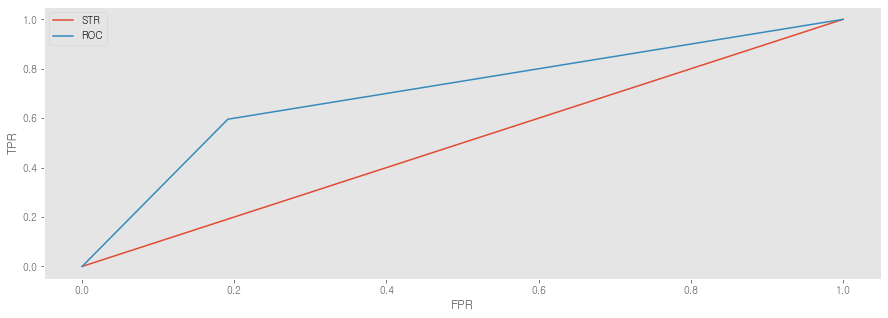

In [32]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test_common)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [33]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7021276595744681


## svm

In [20]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_common, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
2,0.100,0.716252
5,25.000,0.702991
4,10.000,0.697730
3,1.000,0.694991
6,50.000,0.694919
7,100.000,0.689622
1,0.010,0.679099
0,0.001,0.609730


In [21]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 0.1}


In [22]:
model_best_svm = svm.SVC(C=0.1,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_common, y_train['CIP'])

SVC(C=0.1, kernel='linear', probability=True, random_state=1234)

In [24]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_common)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.713
recall score: 0.553


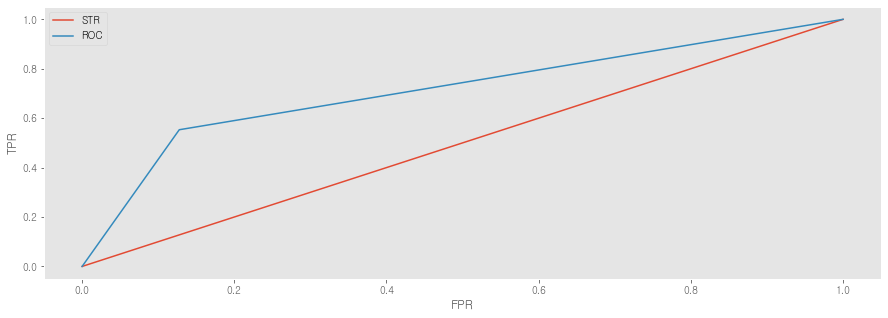

In [25]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_common)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [26]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7127659574468086


## logistic regression

In [36]:
#표준화

common_numeric_cols = ['Hb','iDBP','pCO2','Plt']

scaler = StandardScaler()

x_train_common_logistic = x_train_common.copy()
x_test_common_logistic = x_test_common.copy()


x_train_common_logistic[common_numeric_cols] = scaler.fit_transform(x_train_common_logistic[common_numeric_cols])
x_test_common_logistic[common_numeric_cols] = scaler.transform(x_test_common_logistic[common_numeric_cols])




In [39]:


logit_mod = sm.Logit(y_train['CIP'], x_train_common_logistic)
results = logit_mod.fit()

#model_logistic = LogisticRegression( )
#model_logistic.fit( x_train_base_logistic, y_train['CIP'] )
#model_logistic.predict( x_test_base_logistic )

predicted = results.predict(x_test_common_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('common feature accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('common feature recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.603672
         Iterations 7
0     0.440090
1     0.464178
2     0.443258
3     0.520686
4     0.451146
        ...   
89    0.317229
90    0.751333
91    0.833572
92    0.365597
93    0.393449
Length: 94, dtype: float64
Baseline accuracy :  0.6276595744680851
Baseline recall :  0.7659574468085106


In [40]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                    CIP   No. Observations:                  374
Model:                          Logit   Df Residuals:                      361
Method:                           MLE   Df Model:                           12
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.1291
Time:                        15:35:45   Log-Likelihood:                -225.77
converged:                       True   LL-Null:                       -259.23
Covariance Type:            nonrobust   LLR p-value:                 1.203e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bed            0.7251      0.321      2.256      0.024       0.095       1.355
Hsp-acq        1.2483      0.402      3.108      0.002       0.461       2.035
3m-Ab          0.4681      0.358      1.307      0.1

In [41]:
print(classification_report(y_true=y_test['CIP'],y_pred=predicted) )

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        47
           1       0.60      0.77      0.67        47

    accuracy                           0.63        94
   macro avg       0.64      0.63      0.62        94
weighted avg       0.64      0.63      0.62        94



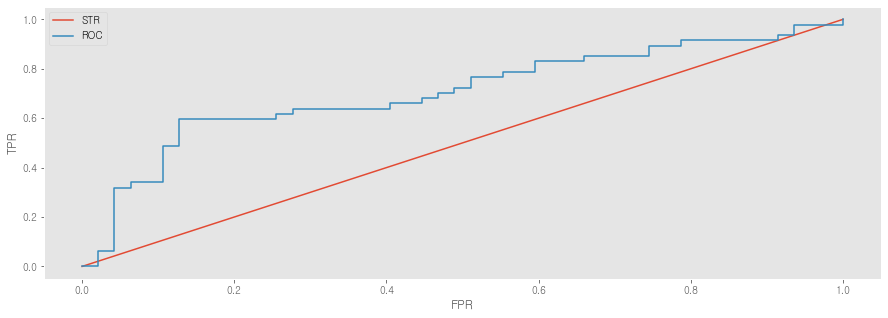

In [43]:
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_common_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [44]:
    #baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))

roc auc value 0.705296514259846
